# <center>Homework Sheet 1</center>
# <center>VU Numerical Algorithms</center>

# Basic Guidelines - please read carefully!

<ul>
  <li> 
      Your homework report is <u>very important</u> for the grading of your homework. Your report has to provide a clear, well-structured, compact and understandable summary of what you did for your homework and what the results are (including <u>well explained and understandable</u> figures of your experimental results).
  </li>
  <li> 
      For the programming parts, a correct implementation is not sufficient. If you do <u>not</u> provide a clear and well readable summary of your implementation and of your experiments, you will not get a good grade on the programming part.
  </li>
  <li>
      Due to the number of students in class, we cannot debug your code in case it produces wrong results. As a consequence, incorrect code in a programming part will always lead to zero points for this part, since it is not possible to find your
programming errors and distinguish between different implementation errors.
  </li>
  <li>
      In total, your report for this homework sheet may at most have <u>3000 words</u> (just for the programming part, not including the Paper-and-Pencil exercises, which should be in the same document though).
  </li>
  <li>
  You should do this assignment on your own - working in groups is NOT allowed. 
  </li>
  <li>
  Do not use any existing code which you did not write yourself! However, for solving linear systems in this assignment, feel free to use `scipy` functions.
  </li>
</ul>

# Submission:
- Before submitting your homework, please ensure that all plots and results are reproducible by using `Restart and run all` from the `Kernel` button in the toolbar.
- Upload a `ipynb` file with all your source code and your report (in `markdown` with all plots and discussions of results as well as your solution to the paper-and-pencil exercises) on the course page in Moodle.
- Name your notebook `a<matriculation number>_<last name>.ipynb` (e.g. a01234567_Mustermann.ipynb)
- Additional files or folders are not allowed.

## Paper-and-Pencil Exercises

1. <u>(2 points)</u> We have discussed elementary elimination matrices $M_{k}$ in class. Prove the following two properties of elementary elimination matrices, which are very important for making LU factorization work efficiently in practice: <br>

- Property (a): $M_k$ is nonsingular. <br>
  Hint: Represent $M^{‚àí1}_{k}$ explicitly and then show that $M_{k} M^{‚àí1}_{k} = M^{‚àí1}_{k} M_{k} = I$.

- Property (a): The product of two elementary elimination matrices $M_{k}$ and $M_{j}$ with $k \le j$ is essentially their ‚Äúunion‚Äù; and therefore they can be multiplied without any computational cost.

2. <u>(2 points)</u> We know that a matrix $A$ is singular if $det(A) = 0$. Can we also conclude that the determinant of a matrix is a good indicator of near singularity? In other words, does the magnitude of a nonzero determinant give any information about how close to singular the matrix is? <br> Give a proof for your answer. <br>
Hints: Experimental investigations may help for getting a first idea. It may also help to consider simple cases, such as multiples of the identity matrix.

## Answers for  paper-and-Pencil Exercises
- For the first question, I used a book called Numerical Algorithms by Justin Solomon page 52
  to understand how to represent the M matrix explicitly. I will use the book's 
  representation for the following proofs.
- let A be the original matrix and suppose we wish to scale row k by a constant c and add the result to row $l$.
- c is a constant that scales the row k of A
- The product $e_{k}^{T}.A$ picks out the k-th row of A
- Premultiplying the result by $e_{l}$ yields a matrix $e_{l}.e_{k}^{T}.A$ that is zero except on its $l$-th row, which is equal to the k-th row of A.
- Hence: 
-- $M_{k} = I_{n*n} + c.e_{l}.e_{k}^{T} $
-- $M^{‚àí1}_{k} = I_{n*n} - c.e_{l}.e_{k}^{T} $

#### 1.a $M_{k}$ is nonsingular
- $M_{k}.M^{‚àí1}_{k} = (I_{n*n} + c.e_{l}.e_{k}^{T}) (I_{n*n} - c.e_{l}.e_{k}^{T}) $
- $M_{k}.M^{‚àí1}_{k} = I_{n*n} + (- c.e_{l}.e_{k}^{T} + c.e_{l}.e_{k}^{T}) + (c^{2}.e_{l}.e_{k}^{T}.e_{l}.e_{k}^{T})$
- $M_{k}.M^{‚àí1}_{k} = I_{n*n}+ c^{2}.e_{l}.(e_{k}^{T}.e_{l}).e_{k}^{T}$
- $M_{k}.M^{‚àí1}_{k} = I_{n*n}$ since $(e_{k}^{T}.e_{l}) = e_{k}.e_{l} = 0 $ and $l$ != $k$
- Conclusion: $M_{k}$ is nonsingular

#### 1.b The product of  $M_{k}$ and $M_{j}$ with $k \le j$ is essentially their union
-- $M_{k} = I_{n*n} + c.e_{l}.e_{k}^{T} $
-- $M_{j} = I_{n*n} + c.e_{l}.e_{j}^{T} $

- $M_{k}.M_{j} = (I_{n*n} + c.e_{l}.e_{k}^{T}).(I_{n*n} + c.e_{l}.e_{j}^{T})$
- $M_{k}.M_{j} = I_{n*n} + (c.e_{l}.e_{k}^{T} + c.e_{l}.e_{j}^{T}) + (c^{2}.e_{l}^{2}.e_{k}^{T}.e_{j}^{T})$
- $M_{k}.M_{j} = I_{n*n} + (c.e_{l}.e_{k}^{T} + c.e_{l}.e_{j}^{T})$ since $(e_{k}^{T}.e_{l}) = e_{k}.e_{l} = 0$
- Conclusion :  The product of two elementary elimination matrices $M_{k}$ and $M_{j}$ with $k \le j$ is essentially their ‚Äúunion‚Äù; and therefore they can be multiplied without any computational cost.
#### 2 ) Is the determinant a good indicator of singularity ?
- We know that det(kA) = $k^{n}$.det(A). So the determinant of the matrix can be made  small or large just by scaling it with k.

- Hence, we can make the determiant of a given matrix close to zero, yet, we can not tell how close to singularity the matrix is, since a simple re-scaling will change the determinant without affecting the condition of the matrix.

- In conclusion, the determinant is not a good indicator of singularity. To determine the singularity of a matrix, we use the condition number instead.

## Programming Exercise

### Prerequisites
#### 1. Basics: <br>
- Please use Python version 3.5 or higher and indicate the Python version in your report. Your submission will be evaluated.
- Pay attention to the interface definitions, i.e., use the specified terms. In/output parameters must be in the specified order.
- Your functions should always check the number and types of input arguments.
- Do not use any existing code which you did not write yourself! However, for solving linear systems in this assignment, feel free to use `scipy` functions.
- Do not exploit any special structure in the input data. Your functions must be generic and have to work for all n > 1.
- You can define your own functions in order to write modular code but please stay consistent with the predefined notebook structure.
- Further, you can add more parameters, so you do not need to recompute parts of the program and accelerate your computation. However, you should add default parameters, so the program still works with the predefined parameters given in the assignment description.

In [1]:
# imports you will need
import numpy as np
import scipy
from matplotlib import pyplot as plt
import time

#### 2. Interface: <br>
- Mandatory for ***Parts I***:

1. Create a function `magnitude` of the following form:
$$[z] = magnitude\;(x, y)$$
<u>Input</u>: $x$ and $y$ are scalars. <br>
<u>Output</u>: scalar $m$, with:
$m = \frac{\max(x, y)}{\min(x, y)}$ <br>
Remark: Use this routine to assess the accuracy of your condition estimator.

In [2]:
def magnitude(x, y):
    # TODO: Write your implementation of the function
    m = max(x,y)/min(x,y)
    return m

2. Create a function `est_cond` of the following form:
$$[c] = \text{est_cond}(A)$$
<u>Input</u>: $n \times n$ matrix A. <br>
<u>Output</u>: scalar c which is the estimated 1-norm condition number of A.

In [3]:
def est_cond(A):

    norm_of_A = np.linalg.norm(A,1) # computing the norm of the matrix A

    L,U = scipy.linalg.lu(A, permute_l=True) # LU decomposition

    n = len(A[0]) # getting the fist dimension of the matrix A

    # initializing intermediate vectors
    t = np.zeros((n,n))
    w = np.transpose(np.zeros(n))

    # initializing intermediate variables
    ep = 1
    em = -1
    tj=0

    # initializing intermediate lists
    TP = []
    TM = []
    WP = []
    WM = []

    for k in range(n):

        if t[k,0] != 0:
            ep = np.sign(-t[k,0])

            em = -ep

        TP.append(ep-t[k,0]) 
        TM.append(em-t[k,0])

        WP.append(TP[k]/U[k,k])
        WM.append(TM[k]/U[k,k])

        SP = abs(TP[k])
        SM = abs(TM[k])

        if k >= 1:
            for j in range(k+1, n):
                SP = SP + abs(w[j]) + U[k,j]*WP[k]
                SM = SM + abs(w[j]) + U[k,j]*WM[k]

        if SP >= SM:
            w[k] = WP[k]
            t[k+1:n,0] = t[k+1:n,0] + U[k,k+1:n]*WP[k]

        else:
            w[k] = WM[k]
            t[k+1:n,0] = t[k+1:n,0] + U[k,k+1:n]*WM[k]

    # here we solve 3 linear systems
    y = scipy.linalg.solve(np.transpose(L), w) # LT * Y = W
    v = scipy.linalg.solve(L, y)               # L * V = Y
    z = scipy.linalg.solve(U, v)               # U * Z = V
    c = (norm_of_A*np.linalg.norm(z,1))/np.linalg.norm(y,1)
    return c

- Mandatory for ***Parts II***:

1. Create a function `rhs_perturbation` of the following form:
$$[E, delta] = \text{rhs\_perturbation}(n)$$
<u>Input</u>: The dimension $n$. <br>
<u>Output</u>: Random $n \times n$ matrix $E$ , random $n \times 1$ vector delta $b$, both of `L1-norm` $10^{-8}$.

In [4]:
def rhs_perturbation(n):
    # TODO: Write your implementation of the function
    norm_required = pow(10,-8);
    
    E = np.random.rand(n,n)
    E = E * norm_required / np.linalg.norm(E, 1)
    
    delta = np.random.rand(n,1)
    delta = delta * norm_required/np.linalg.norm(delta, 1)
     
    return E, delta

2. Create a function `lhs perturbation` of the following form:
$$[x, \text{delta\_x}] = \text{lhs\_perturbation}(A, E, b, \text{delta\_b})$$
<u>Input</u>: $n \times n$ matrices $A$ and $E$, $n \times 1$ vectors $b$ and $\text{delta\_b}$. <br>
<u>Output</u>: $n \times 1$ vector $x$ which is the solution to the linear system $Ax = b$, $n \times 1$ $\text{vector\_delta}$ $x$ which is the difference $\hat{x} ‚àí x$ between $x$ and the solution $\hat{x}$ to the perturbed linear system.

In [5]:
def lhs_perturbation(A, E, b, delta_b):
    # TODO: Write your implementation of the function
    x = scipy.linalg.solve(A,b)
    x_hat = scipy.linalg.solve(A + E , b + delta_b)
    delta_x = x-x_hat
    
    return x, delta_x

3. Create a function `bounds` of the following form:
$$[lb, rb] = bounds(A, E, b, \text{delta\_b})$$
<u>Input</u>: $n \times n$ matrices $A$ and $E$, $n \times 1$ vectors $b$ and $\text{delta\_b}$. <br>
<u>Output</u>: scalar $lb$ containing the left hand side, scalar $rb$ containing the right hand side of the <b> bound (2) </b> in the assignment text.

In [6]:
def bounds(A, E, b, delta_b):
    # TODO: Write your implementation of the function
    x,delta_x = lhs_perturbation(A,E,b,delta_b)
    
    lb = np.linalg.norm(delta_x,1)/np.linalg.norm(x,1);
    
    rb_part1 = np.linalg.norm(delta_b,1)/np.linalg.norm(b,1)
    rb_part2 = np.linalg.norm(E,1)/np.linalg.norm(A,1)
     
    
    rb = np.linalg.cond(A, 1)*(rb_part1 + rb_part2);
    
    return lb, rb

#### Part I - A Condition Estimator <u>(8 points)</u>
Take a look at the condition estimation algorithm implemented in LINPACK and described in the following references.
- Jack J Dongarra et al. LINPACK users‚Äô guide. SIAM, 1979, pp. 1.11‚Äì1.13.
- A. K. Cline et al. ‚ÄúAn Estimate for the Condition Number of a Matrix‚Äù. In: SIAM Journal on Numerical An 16.2 (1979), pp. 368‚Äì375. url: http://www.jstor.org/stable/2156842.

1. <u>(3 points)</u> Explain how and why this condition estimation algorithm works.
2. <u>(5 points)</u> Implement this algorithm and compare it experimentally to `numpy.linalg.cond(A, p=1)`, and `exact_cond` in terms of runtime and quality of the condition estimation. <br> In particular, for varying matrix dimension up to $n = 500$ (random dense matrices), plot the difference in magnitude
$$magn(x, y) = \frac{\max{x, y}}{\min(x, y)}$$
between the estimated condition number $x$ (for both your implementation and `numpy.linalg.cond`) and the ‚Äúexact‚Äù condition number $y$ (from cond). Why is the quantity (1) informative?

In [7]:
# This function is implemented for you =)
def exact_cond(A, p=1):
    """
    Compute the exact condtion number by computing matrix A's and its inverse's norms, then multiply them.
    
    :param A: 2darray. 2 dimensional matrix.
    :param p: int. the order of the norm.
    :return: The condtion number of the matrix A
    """
    assert isinstance(p, int), "the order of the norm need to be intger."
    # compute the inverse
    inv_A = np.linalg.inv(A)
    # compute the norm of the matrix A
    norm_A = np.linalg.norm(A, ord=p)
    # compute the norm of the inverse of matrix A
    norm_inv_A = np.linalg.norm(inv_A, ord=p)
    return norm_A * norm_inv_A

<u>Your report has to contain:</u>
1. A paragraph (about 10 lines) which explains the algorithm.
2. A figure containing the comparison of the quality of the two estimators
3. A figure containing the runtime comparison of cond, condest and your implementation
4. A brief discussion of your results

In [8]:
# TODO: Write your implementation here


Exact_time= []
Numpy_time = []
Linpack_time = []


Exact_Numpy_magnitude = []
Exact_Linpack_magnitude = []


for i in range(2,500,10):
    
    randomMatrix = np.random.rand(i,i)
    
    
    t1 = time.time()
    exact_condition = exact_cond(randomMatrix)
    t2 = time.time()
    
    Exact_time.append(t2-t1)
    
    
    t1 = time.time()
    numpy_condition = np.linalg.cond(randomMatrix, 1)
    t2 = time.time()
    
    Numpy_time.append(t2-t1)
    Exact_Numpy_magnitude.append(magnitude(numpy_condition,exact_condition))
    
    
    
    t1 = time.time()
    linpack_condition = est_cond(randomMatrix)
    t2 = time.time()
    
    Linpack_time.append(t2-t1)
    Exact_Linpack_magnitude.append(magnitude(linpack_condition,exact_condition))




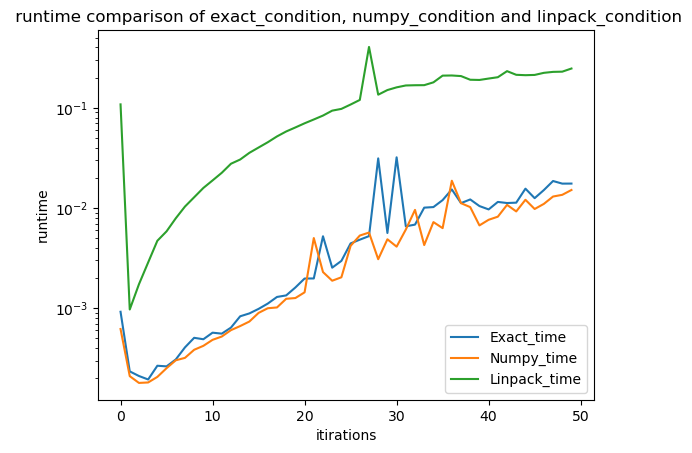

In [9]:
plt.figure() 

plt.plot(Exact_time, label='Exact_time')
plt.plot(Numpy_time, label='Numpy_time')
plt.plot(Linpack_time, label='Linpack_time')
plt.yscale("log")
# Extra information
plt.title(' runtime comparison of exact_condition, numpy_condition and linpack_condition') # titre
plt.xlabel('itirations') # axes
plt.ylabel('runtime') # axes
plt.legend() # legend

plt.show() # show the figure

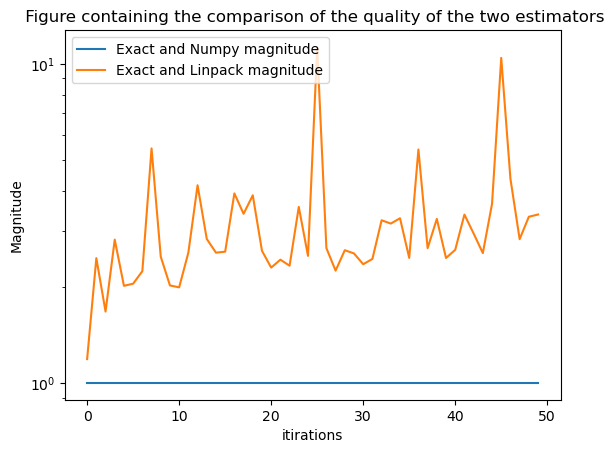

In [10]:
plt.figure() 

plt.plot(Exact_Numpy_magnitude, label='Exact and Numpy magnitude')
plt.plot(Exact_Linpack_magnitude, label='Exact and Linpack magnitude')
plt.yscale("log")
# Extra information
plt.title(' Figure containing the comparison of the quality of the two estimators') # titre
plt.xlabel('itirations') # axes
plt.ylabel('Magnitude') # axes
plt.legend() # legend

plt.show() # show the figure

# Report part 1
### Explanation of the linpack algorithm
- We know that $‚Äñùê¥^{-1}‚Äñ$ since $cond(A) = ‚Äñùê¥‚Äñ . ‚Äñùê¥^{-1}‚Äñ$ and the norm of A is easy to       compute. But our main problem is to estimate the norm of $ùê¥^{-1}$ which is very             computationally expensive for larger sized matrices. For that reason, we will use the       linpack algorithm to esmtimate $‚Äñùê¥^{-1}‚Äñ$.

- Te idea is to solve a linear system Az = y and then estimating $‚Äñùê¥^{-1}‚Äñ ‚âà ‚Äñùë¶‚Äñ.‚Äñùëß‚Äñ$
- In order to make this estimate accurate we make ‚Äñùë¶‚Äñ as large as possible. Using a LU
  factorization this process can be done in 2 steps:
  
-- $(ùêøùëà)^{ùëá} ùë• = ùëè$ and $ùêøùëàùë¶ = ùë•$.--> the resulting solution is: $ùëà^{ùëá} ùêø^{ùëá} ùë• = ùëè$.
   In order to solve this equation we need to solve the following linear systems:
   . $ùëà^{ùëá} ùëß = ùëè$  and  $ùêø^{ùëá} ùë• = ùëß$.

-- Using heuristics aproach as mentioned in the pdf supports.

   




### Introduction
- The first graph is showing the runtime comparison of exact_condition, numpy_condition 
  and linpack_condition
- The second graph is showing a figure containing the comparison of the quality of the two   estimators
- In this part I am using the exact_cond provided in this notebook along side the linpack
  cond and the numpy cond.
### Summary
- Then I used one for loops to generate random matrices.
- In each iteration, I computed the runtime of the three functions and stored it in the 
  three conresponding lists to plot them after.
- I also computed two magnitude: the first one between exact cond and numpy cond, and the
  second one between exact cond and linpack cond. I plotted them too in their corresponding
  graph.
### Discussion and interpretation
- The first graph shows that the runtime of linpack function is bigger than the other two, while the numpy function is slightly faster than the exact_cond function.
- The second graph shows that there is an important magnitude between the exact_cond and     linpack_ cond, while the magnitude between the exact_cond and the numpy_cond is always 1
  because the two functions return always the same value.
- In conclusion, the linpack function is not optimal and the exact_cond function is slower       than numpy's cond funcion. 

#### Part II - Average Case Perturbation Errors <u>(4 points)</u>
We have seen in class that the relative error in the solution of a linear system due to perturbations $E$ in the matrix $A$ and $\Delta b$ in the right hand side $b$ can be bounded as
$$\frac{\|\Delta x\|}{\|x\|} \leq \mbox{cond}(A) \left( \frac{\| \Delta b \|}{\| b \|} + \frac{\|E\|}{\|A\|}\right) $$
This is a worst-case bound.

In this exercise your task is to empirically evaluate how tight this analytical bound is and how the relative error in practice relates to this bound. For this purpose, proceed as follows:
- Consider the l1-norm and $n = 100 : 50 : 1500$
- For each $n$, generate
    - a single random $\Delta b$ with $\| \Delta b \|_{1} = 10^{‚àí8}$
    - a single random $E$ with $\| E \|_{1} = 10^{‚àí8}$
    - many random $A$ and $b$
- For each $n$, compute the averages of the left and right hand sides of the <b>bound (2)</b> over the randomly generated input data $A$ and $b$.
- Plot the averages of the left and right hand sides of the <b>bound (2)</b> over $n$.

What are your conclusions?

<u>Your report has to contain:</u>
1. A figure showing the averages of left and right hand sides of the bound (2)
2. A brief discussion thereof

In [11]:
# TODO: Write your implementation here

lhs_average = []
rhs_average = []


for i in range(100,1500,50):
    E, delta_b = rhs_perturbation(i)
    A = np.random.rand(i,i)
    b = np.random.rand(i,1)
    lhs,rhs = bounds(A, E, b, delta_b)
    lhs_average.append(lhs)
    rhs_average.append(rhs)

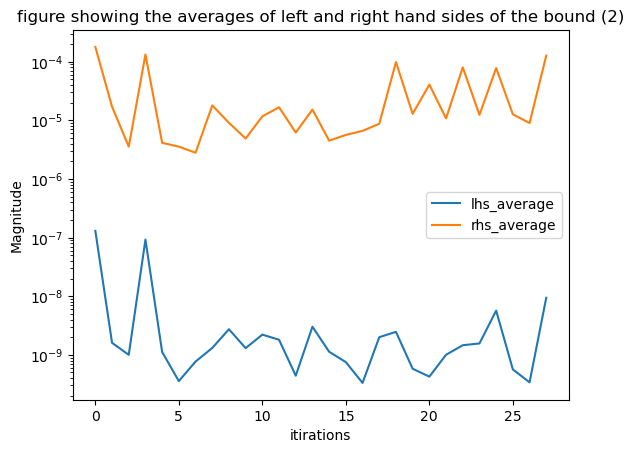

In [12]:
plt.figure() 

plt.plot(lhs_average, label='lhs_average')
plt.plot(rhs_average, label='rhs_average')
plt.yscale("log")
# Extra information
plt.title('figure showing the averages of left and right hand sides of the bound (2)') # title
plt.xlabel('itirations') # axes
plt.ylabel('Magnitude') # axes
plt.legend() # legend

plt.show() # show the figure

# Report part 2
### Introduction
- The last figure is showing the averages of left and right hand sides of the bound (2)
- In this part I am using the bounds and rhs_perturbation functions implemented previously.
### Summary
- Then I used one for loops to generate random matrices. This loop starts from a size of
  100 to 1500 by a step of 50 as requested.
- In each iteration, I computed E and delta_b using rhs_perturbation function. 
- After that, I used the last results as inputs of the bounds function in order to obtain
  the left and right hand side of the bound separately.
- I stored lhs and rhs in two list to plot them in the graph above.

### Discussion and interpretation
- The plot shows that  the lhs graph is always below rhs graph.
- Hence, the bounds inequality is correct:
$$\frac{\|\Delta x\|}{\|x\|} \leq \mbox{cond}(A) \left( \frac{\| \Delta b \|}{\| b \|} + \frac{\|E\|}{\|A\|}\right) $$